# Q2 K-NN Regression with k-d tree

In [63]:
from sklearn.neighbors import KDTree
import numpy
from data.data_utils import load_dataset
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.linalg import svd
from pdb import set_trace
import time

In [64]:
np.random.seed(42)

## Functions from Q1

In [65]:
def knn_regressor(x_train, y_train, x_test, k, metric = "minkowski_2") -> np.array:
    """
    Find the k-th closest data points along x axis and take the average of their y values.
    Do that for all testing data and return the predicted y values.
    """
    y_test = np.zeros((x_test.shape[0], 1))
    # print(y_test.shape)
    for i, x_test_i in enumerate(x_test):
        if metric == "minkowski_2":
          dist = np.sqrt(np.sum(np.square(x_train - x_test_i.reshape((1,-1))), axis = 1))
        elif metric == "minkowski_1":
          dist = np.sum(np.abs(x_train - x_test_i.reshape((1,-1))), axis = 1)
        else:
            pass
        i_nn = np.argpartition(dist, kth=k)[:k]
        # k=5: i_nn=[122 384  90 399  40] etc
        # compute the mean of these nearest neighbours
        y_test[i,0] = np.mean(y_train[i_nn, 0])
    # y_test: [[mean y for x_test_1], [mean y for x_test_2], [mean y for x_test_3]] ...
    return y_test


def knn_regressor_kd_tree(x_train, y_train, x_test, k, metric = "minkowski_2") -> np.array:
    if metric == "minkowski_2":
        kd = KDTree(x_train, metric="l2")
    elif metric == "minkowski_1":
        kd = KDTree(x_train, metric="l1")
    else:
        pass
    neighbours = kd.query(x_test, k, return_distance=False, sort_results=False)
    y_hat = np.mean(y_train[neighbours, 0], axis=1, keepdims=True)
    # y_test: [[mean y for x_test_1], [mean y for x_test_2], [mean y for x_test_3]] ...
    return y_hat

In [66]:
kd_tree = []
brute_force = []
d_test = [2, 4, 8, 16, 32, 64, 128]
for d in d_test:
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=5000, d=d)

    t0 = time.time()
    knn_regressor_kd_tree(x_train, y_train, x_test, k = 5, metric = "minkowski_2")
    t1 = time.time()
    kd_tree.append(t1-t0)

    t0 = time.time()
    knn_regressor(x_train, y_train, x_test, k = 5, metric = "minkowski_2")
    t1 = time.time()
    brute_force.append(t1-t0)

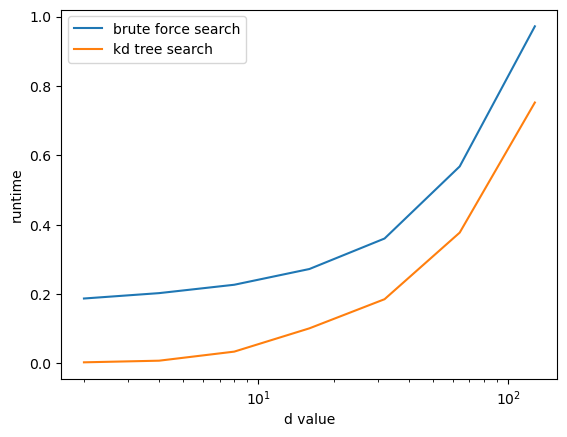

In [67]:
plt.figure()
plt.xlabel('d value')
plt.ylabel('runtime')
plt.semilogx(d_test, brute_force, label='brute force search')
plt.semilogx(d_test, kd_tree, label='kd tree search')
plt.legend(loc='best')